# KNN Clustering
In this project, we are using a classified data set from a company. This dataset has the feature column names hidden but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv("Classified Data",index_col=0)

In [15]:
df.head(4)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1


## Standardize Data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [64]:
#new df with standardized data 
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

## Train & Test Split

In [65]:
#data split
from sklearn.model_selection import train_test_split

In [66]:
X = df_feat
y= df['TARGET CLASS']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .3)

## Model 
Using K=1

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predictions

In [71]:
pred = knn.predict(X_test)

## Evaluation

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       157
           1       0.87      0.91      0.89       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [74]:
print(confusion_matrix(y_test, pred))

[[137  20]
 [ 13 130]]


## Choosing a K Value

Using the elbow method to pick a good K Value:

In [75]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

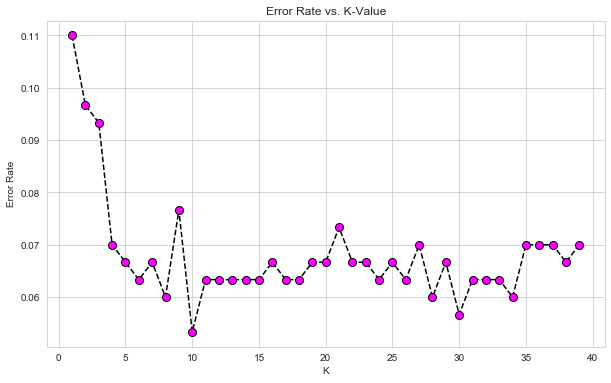

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='black', linestyle='--', marker='o',
         markerfacecolor='magenta', markersize=8)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph, we can see that after arouns K>10 the error rate just tends to hover around 0.06-0.07. 

In [77]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[137  20]
 [ 13 130]]


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       157
           1       0.87      0.91      0.89       143

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [78]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[147  10]
 [  6 137]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       157
           1       0.93      0.96      0.94       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



As we can see from these results, the f1-score increased to 0.95.